--- Generating Synthetic Data ---
Neuron 0: 100 spikes
Neuron 1: 120 spikes
Neuron 2: 200 spikes
Neuron 3: 250 spikes
Neuron 4: 50 spikes
Generated continuous data of shape: (2, 10000)
------------------------------

--- Testing SpikeProcessor ---
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 11.
Processed spikes shape: torch.Size([197, 5, 11])
Shape of grouped X (N0, N1): torch.Size([197, 2, 11])
Shape of grouped Y (N2, N3): torch.Size([197, 2, 11])
✅ Synergy grouping check passed: Number of windows is consistent.
------------------------------

--- Testing ContinuousProcessor ---
Processed continuous shape: torch.Size([197, 2, 200])
✅ Window count matches SpikeProcessor.
------------------------------

--- Visualizing the Windowing Process ---


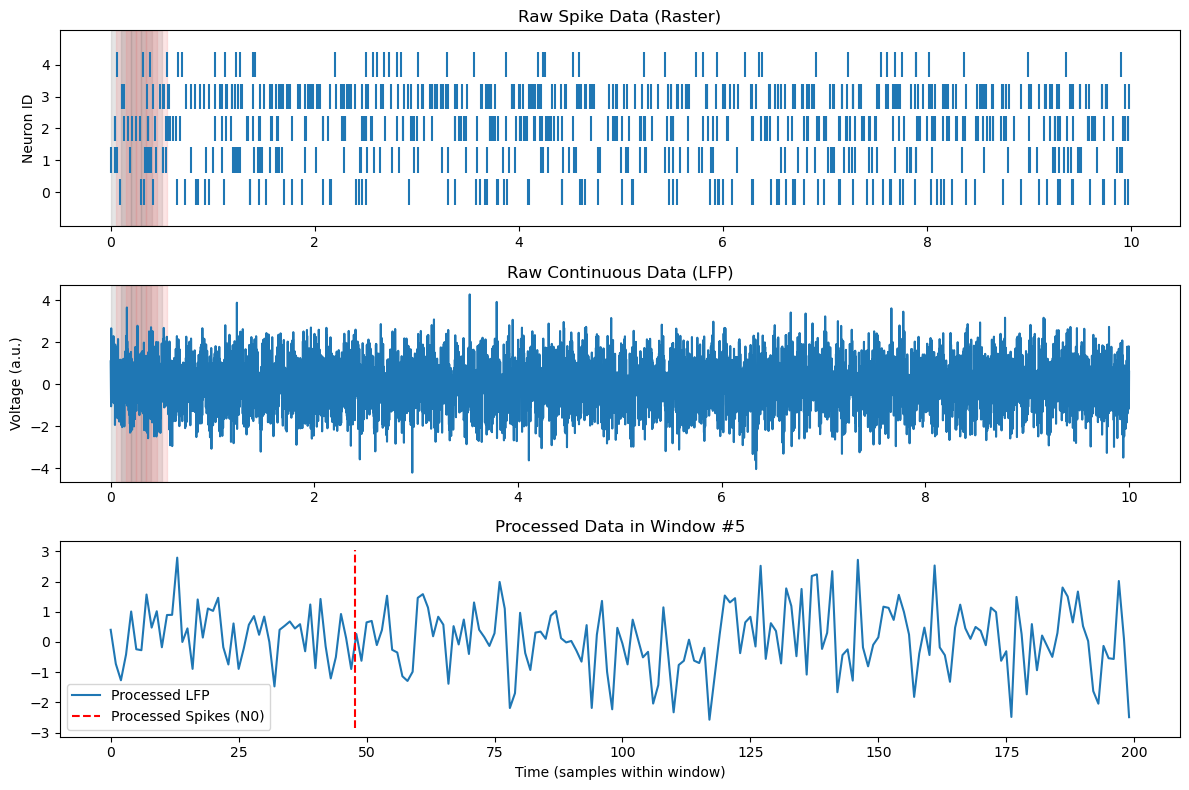


✅ Phase 2 revised test completed successfully!


In [9]:
# test_phase_2_revised.ipynb

import numpy as np
import torch
import matplotlib.pyplot as plt
from neural_mi.data.processors import SpikeProcessor, ContinuousProcessor

# --- 1. Generate Synthetic Data (Spikes and Continuous) ---
T_RECORDING = 10.0
SAMPLING_RATE = 1000  # Hz for continuous data
N_NEURONS = 5
N_LFP_CHANNELS = 2

# --- Spike Data ---
print("--- Generating Synthetic Data ---")
NEURON_RATES = [10, 12, 20, 25, 5]
raw_spike_times = []
for i in range(N_NEURONS):
    num_spikes = int(T_RECORDING * NEURON_RATES[i])
    spikes = np.sort(np.random.uniform(0, T_RECORDING, size=num_spikes))
    raw_spike_times.append(spikes)
    print(f"Neuron {i}: {len(spikes)} spikes")

# --- Continuous Data (e.g., LFP) ---
time_vector = np.linspace(0, T_RECORDING, int(T_RECORDING * SAMPLING_RATE))
lfp_data = np.random.randn(N_LFP_CHANNELS, len(time_vector))
# Add some oscillatory signal
lfp_data += np.sin(2 * np.pi * 8 * time_vector) * 0.5  # 8 Hz alpha
lfp_data[1,:] += np.sin(2 * np.pi * 40 * time_vector) * 0.3 # 40 Hz gamma
print(f"Generated continuous data of shape: {lfp_data.shape}")
print("-" * 30)

# --- 2. Test SpikeProcessor ---
print("\n--- Testing SpikeProcessor ---")
WINDOW_SIZE_S = 0.2  # 200 ms windows
STEP_SIZE_S = 0.05   # 50 ms step

spike_proc = SpikeProcessor(window_size=WINDOW_SIZE_S, step_size=STEP_SIZE_S)
processed_spikes = spike_proc.process(raw_spike_times)
print(f"Processed spikes shape: {processed_spikes.shape}")

# Test synergy grouping
group_X_channels = [0, 1]
group_Y_channels = [2, 3]
processed_X_spikes = spike_proc.process(raw_spike_times, channels_to_group=group_X_channels)
processed_Y_spikes = spike_proc.process(raw_spike_times, channels_to_group=group_Y_channels)

print(f"Shape of grouped X (N0, N1): {processed_X_spikes.shape}")
print(f"Shape of grouped Y (N2, N3): {processed_Y_spikes.shape}")
assert processed_X_spikes.shape[0] == processed_Y_spikes.shape[0]
print("✅ Synergy grouping check passed: Number of windows is consistent.")
print("-" * 30)


# --- 3. Test ContinuousProcessor ---
print("\n--- Testing ContinuousProcessor ---")
WINDOW_SIZE_PTS = int(WINDOW_SIZE_S * SAMPLING_RATE)
STEP_SIZE_PTS = int(STEP_SIZE_S * SAMPLING_RATE)

cont_proc = ContinuousProcessor(window_size=WINDOW_SIZE_PTS, step_size=STEP_SIZE_PTS)
processed_lfp = cont_proc.process(lfp_data)
print(f"Processed continuous shape: {processed_lfp.shape}")
assert processed_lfp.shape[0] == processed_spikes.shape[0]
print("✅ Window count matches SpikeProcessor.")
print("-" * 30)

# --- 4. Visualization ---
print("\n--- Visualizing the Windowing Process ---")
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=False)

# Plot raw spikes (raster plot)
axes[0].eventplot(raw_spike_times, linelengths=0.8)
axes[0].set_title("Raw Spike Data (Raster)")
axes[0].set_ylabel("Neuron ID")
axes[0].set_yticks(range(N_NEURONS))

# Plot raw continuous data
axes[1].plot(time_vector, lfp_data[0, :], label="LFP Channel 0")
axes[1].set_title("Raw Continuous Data (LFP)")
axes[1].set_ylabel("Voltage (a.u.)")

# Show the windows on the raw plots
num_windows_to_show = 8
for i in range(num_windows_to_show):
    win_start = i * STEP_SIZE_S
    axes[0].axvspan(win_start, win_start + WINDOW_SIZE_S, alpha=0.2, color='gray' if i % 2 == 0 else 'lightcoral')
    axes[1].axvspan(win_start, win_start + WINDOW_SIZE_S, alpha=0.2, color='gray' if i % 2 == 0 else 'lightcoral')

# Plot a single window of processed data
win_idx_to_plot = 5
axes[2].plot(processed_lfp[win_idx_to_plot, 0, :].numpy(), label="Processed LFP")
spike_times_in_window = processed_spikes[win_idx_to_plot, 0, :].numpy()
spike_times_in_window = spike_times_in_window[spike_times_in_window > 0] # get actual spikes
axes[2].vlines(spike_times_in_window * SAMPLING_RATE, ymin=plt.ylim()[0], ymax=plt.ylim()[1], color='r', linestyle='--', label="Processed Spikes (N0)")
axes[2].set_title(f"Processed Data in Window #{win_idx_to_plot}")
axes[2].set_xlabel("Time (samples within window)")
axes[2].legend()

plt.tight_layout()
plt.show()

print("\n✅ Phase 2 revised test completed successfully!")

In [3]:
processed_spikes.shape

torch.Size([197, 5, 12])

In [8]:
processed_spikes

tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0257, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0384, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0233, 0.0459, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0070, 0.0262, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0247, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0466, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0269, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0362, 0.0500, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        ...,

     